<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/MLLab7_KNN_BankDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
bank_df=pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#DEALING WITH IMBALANCED DATASETS
bank_df.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [ ]:
##get dummies() will convert oll the columns with data type o5
## objects
encoded_bank_df= pd.get_dummies(bank_df, drop_first= True)
X =encoded_bank_df

In [ ]:
#Encoding the subscribed column and assigning to
Y=bank_df.y.map(lambda x: int(x==1))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,Y,test_size= 0.3,random_state = 42)


In [ ]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
##Initializing the classifier
knn_clf= KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit(train_X, train_y)

KNeighborsClassifier()

In [ ]:
from sklearn import metrics
pred_y=knn_clf.predict(test_X)
auc_score=metrics.roc_auc_score(test_y,pred_y)
print(round(float(auc_score),2))

0.73


In [ ]:
#The method takes the following three parameters
## model: the classification model
#test X: X features of the test set
#test y actual Labels of the test set
##Return
#NROC Auc Score
#FFR and TPRs for different threshold values
from sklearn import metrics
import matplotlib.pyplot as plt
def draw_roc_curve(model, test_X, test_y):
    #Creating and initializing a results Datoframe with actual Lobels
    test_results_df= pd.DataFrame({'actual': test_y})
    test_results_df= test_results_df.reset_index()
    #predict the probabilities on the test set
    predict_proba_df =pd.DataFrame(model.predict_proba(test_X))
    ##selecting the probabilities that the test example belongs
    #to closs 1
    test_results_df ["chd_1"] =predict_proba_df.iloc[:, 1:2]
    ##invoke roc curve() to return fpr, ter and threshold values.
    #Threshold values contain values from 8.0 το 1.0
    fpr, tpr, thresholds =metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate= False)
    #Getting roc ouc score by invoking metrics.roc our score method
    auc_score= metrics.roc_auc_score(test_results_df.actual,test_results_df.chd_1)
    #Setting the size of the
    plot= plt.figure(figsize=(8, 6))
    #Flotting the actual fpr and ter volues
    plt.plot(fpr, tpr, label ='ROC curve (area =%0.2f)' % auc_score)
    ##Flotting th diagnool Line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #Setting Labels and titles
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend (loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

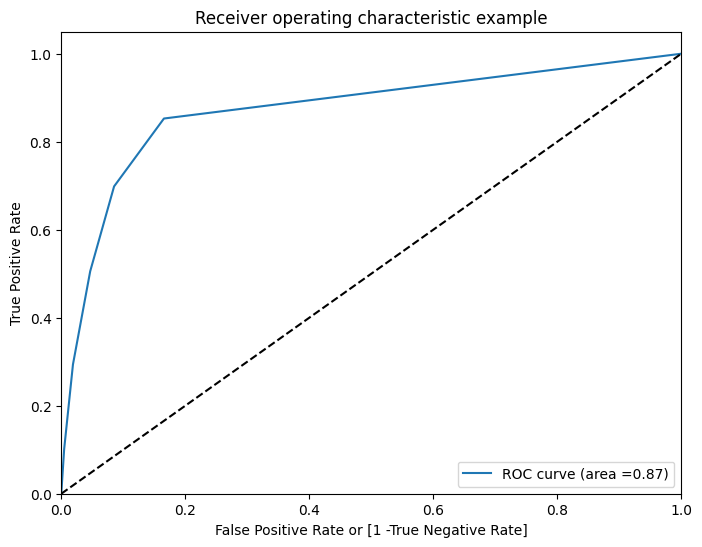

In [ ]:
##Invoking draw_roc_curve with the KNN model
_, _, _, _=draw_roc_curve(knn_clf, test_X, test_y)


In [ ]:
import seaborn as sn
def draw_cm( actual, predicted):
    #Invoking confusion matrix from metric package. The matrix
    #will be oriented as [1,0] 1.e. the classes with label I will be represented by the first row and B as second row
    cm=metrics.confusion_matrix( actual, predicted)
    #Confusion will be plotted as heatmap for better visualization
    #The Labels ore configured to better interpretation from the plot
    sn.heatmap( cm, annot=True, fmt='.2f',
    xticklabels =["Subscribed", "Not Subscribed"],
    yticklabels =["Subscribed", "Not Subscribed"])
    plt.ylabel("True Label")
    plt.xlabel('Predicted label')
    plt.show()

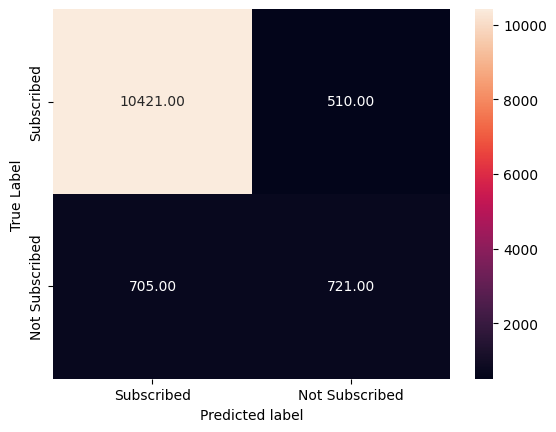

In [ ]:
# Drawing the confusion matrix for KNN model
draw_cm(test_y, pred_y)


In [ ]:
print(metrics.classification_report(test_y, pred_y))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10931
           1       0.59      0.51      0.54      1426

    accuracy                           0.90     12357
   macro avg       0.76      0.73      0.74     12357
weighted avg       0.90      0.90      0.90     12357



In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# creating a dictionary with hyperparameters and possible values
#for searching
tuned_parameters=[ { 'n_neighbors': range(5,10),
'metric': ['canberra', 'euclidean','ninkowski']}]
# configuring grid search
clf=GridSearchCV(KNeighborsClassifier(),
tuned_parameters,
cv=10,
scoring ='roc_auc')
#fit the search with training ser
clf.fit(train_X, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'ninkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

0.9891319540926228

In [ ]:
clf.best_params_


{'metric': 'canberra', 'n_neighbors': 9}

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.04112115, 0.03712485, 0.03650587, 0.03621659, 0.03089423,
        0.04011424, 0.03573389, 0.03399084, 0.03352878, 0.03276732,
        0.00423408, 0.00410109, 0.00405245, 0.00453875, 0.00414915]),
 'std_fit_time': array([9.73799208e-03, 7.16667332e-03, 5.36088884e-03, 1.09723748e-02,
        3.28927946e-03, 1.35511086e-02, 1.16234120e-02, 5.04181600e-03,
        5.69686489e-03, 7.11328773e-03, 4.78655092e-04, 8.03611245e-05,
        1.02357947e-04, 3.21597420e-04, 1.72163600e-04]),
 'mean_score_time': array([13.93152797, 13.26616426, 13.14299734, 12.49365971, 12.75294275,
         0.5596966 ,  0.68240588,  0.54518659,  0.67895539,  0.54953287,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 'std_score_time': array([2.8411079 , 1.11156902, 1.07889051, 0.3161027 , 0.35914148,
        0.03816187, 0.18960483, 0.0073184 , 0.18083392, 0.01675471,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'param_metric': masked

In [ ]:
for i in ['mean_test_score', 'std_test_score', 'rank_test_score']:
    print(i,":",clf.cv_results_[i])

mean_test_score : [0.97807353 0.9822866  0.9856942  0.98787831 0.98913195 0.88119054
 0.89194623 0.89927018 0.9029702  0.90819125        nan        nan
        nan        nan        nan]
std_test_score : [0.00367344 0.00436318 0.00391489 0.00395019 0.00358903 0.00697158
 0.00607792 0.00517424 0.00544017 0.00552116        nan        nan
        nan        nan        nan]
rank_test_score : [ 5  4  3  2  1 10  9  8  7  6 11 11 11 11 11]
